<a href="https://colab.research.google.com/github/RTae/CPE213/blob/main/week4/script/CPE213_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [3]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [95]:
coursea <- read.csv("./coursea_data.csv")

In [96]:
coursea <- coursea %>% 
  filter(!is.na(course_students_enrolled)) %>%
  mutate(course_students_enrolled = as.numeric(sub("k", "e3", course_students_enrolled, fixed = TRUE)))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


In [97]:
summary(coursea)

       X         course_title       course_organization course_Certificate_type
 Min.   :  0.0   Length:891         Length:891          Length:891             
 1st Qu.:222.5   Class :character   Class :character    Class :character       
 Median :445.0   Mode  :character   Mode  :character    Mode  :character       
 Mean   :445.0                                                                 
 3rd Qu.:667.5                                                                 
 Max.   :890.0                                                                 
                                                                               
 course_rating   course_difficulty  course_students_enrolled
 Min.   :3.300   Length:891         Min.   :  1500          
 1st Qu.:4.600   Class :character   1st Qu.: 17000          
 Median :4.700   Mode  :character   Median : 42000          
 Mean   :4.677                      Mean   : 81378          
 3rd Qu.:4.800                      3rd Qu.: 98500     

# Numerical data

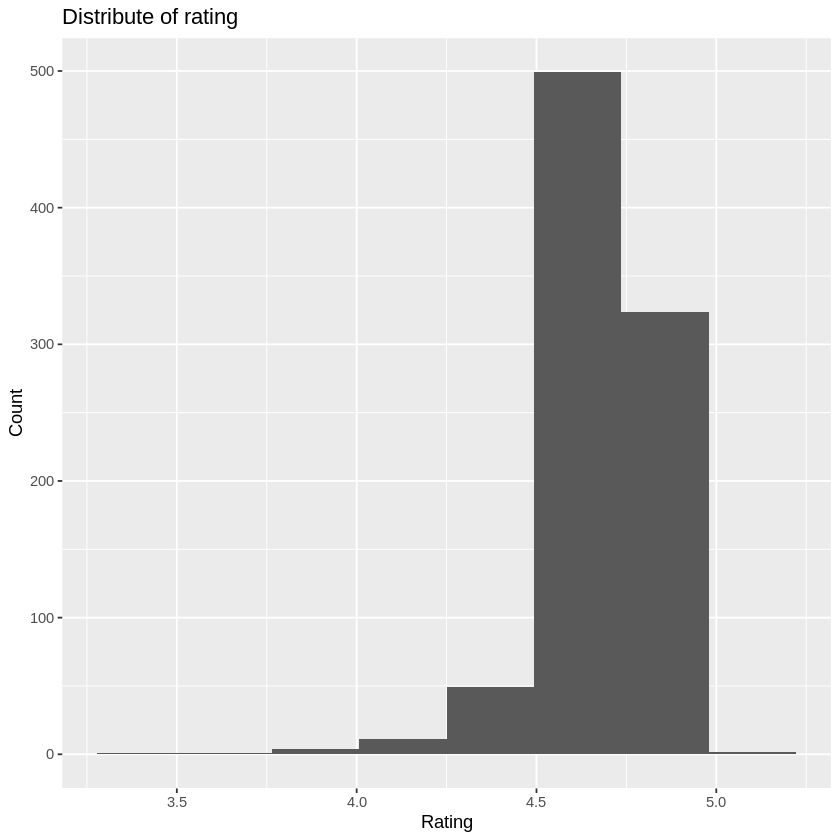

In [116]:
coursea %>%
  ggplot(aes(course_rating)) +
  geom_histogram(bins=8) + 
  ggtitle("Distribute of rating") +
  xlab("Rating") +
  ylab("Count")

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”


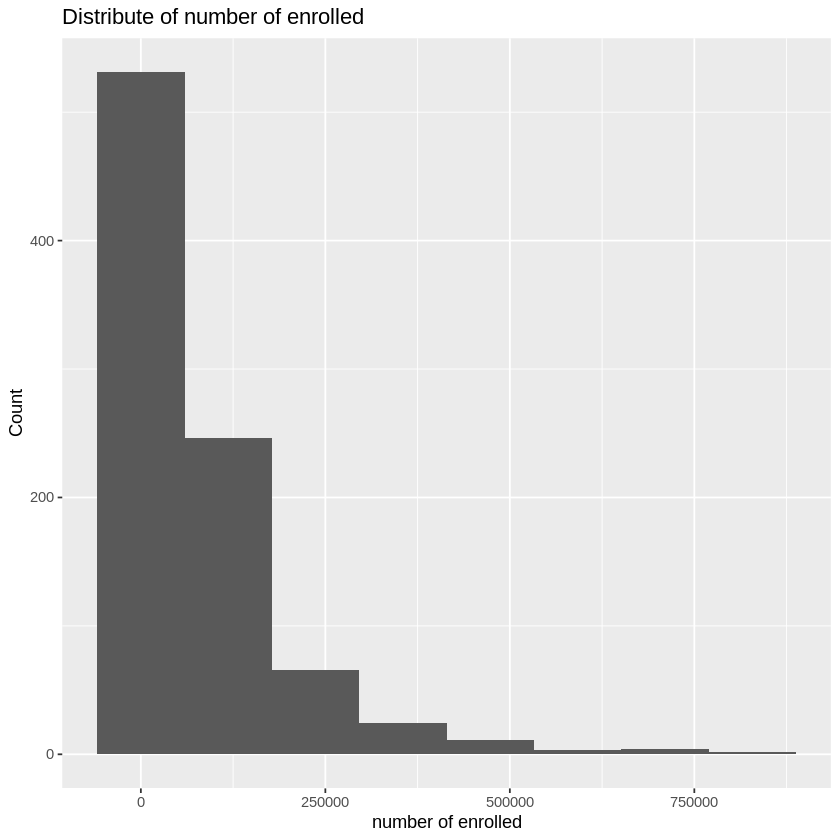

In [117]:
coursea %>%
  ggplot(aes(course_students_enrolled)) +
  geom_histogram(bins=8) + 
  ggtitle("Distribute of number of enrolled") +
  xlab("number of enrolled") +
  ylab("Count")

In [100]:
factor_rating <- coursea %>%
  summarise(Q1 = quantile(course_rating, 0.25),
            IQR = IQR(course_rating))

lowerIQR_rating = factor_rating$Q1 - 1.5*factor_rating$IQR

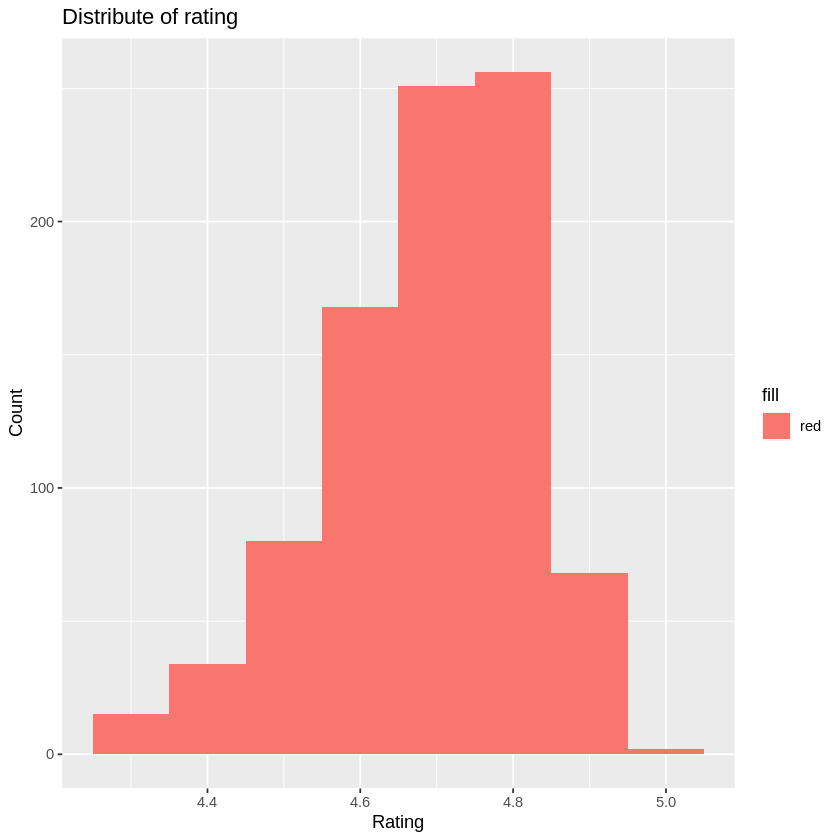

In [119]:
coursea %>% 
  filter(course_rating > lowerIQR_rating) %>%
  ggplot(aes(course_rating, fill="red")) +
  geom_histogram(bins=8)+ 
  ggtitle("Distribute of rating") +
  xlab("Rating") +
  ylab("Count")

In [102]:
factor_enrolled <- coursea %>%
  filter(!is.na(course_students_enrolled)) %>%
  summarise(Q1 = quantile(course_students_enrolled, 0.25),
            IQR = IQR(course_students_enrolled))

lowerIQR_enrolled = factor_enrolled$Q1 + 1.5*factor_enrolled$IQR

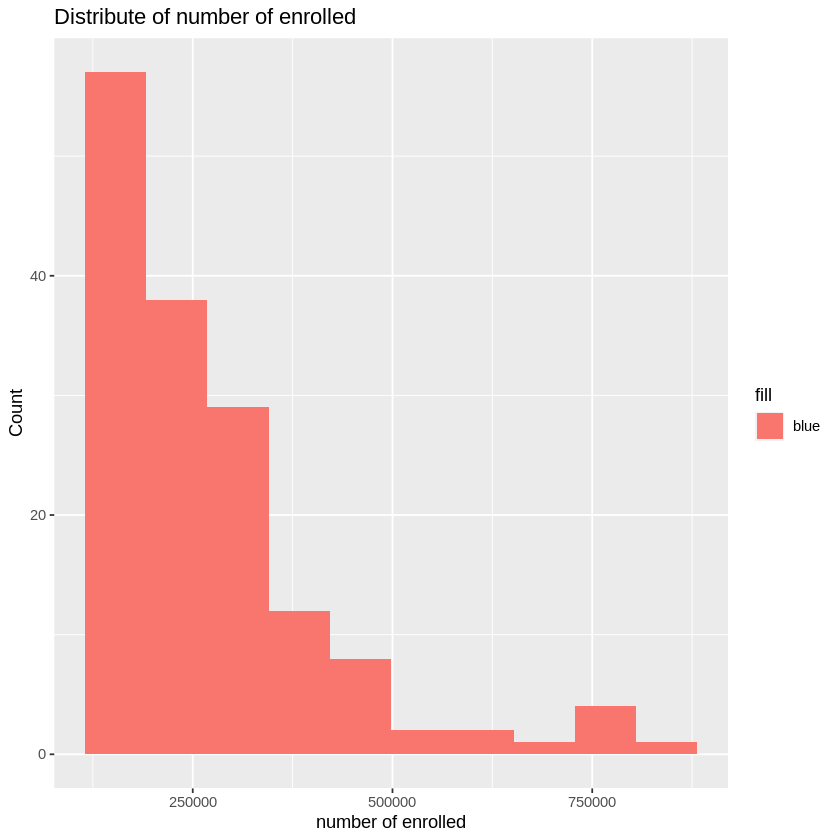

In [118]:
coursea %>% 
  filter(course_students_enrolled > lowerIQR_enrolled) %>%
  ggplot(aes(course_students_enrolled, fill='blue')) +
  geom_histogram(bins=10)  + 
  ggtitle("Distribute of number of enrolled") +
  xlab("number of enrolled") +
  ylab("Count")

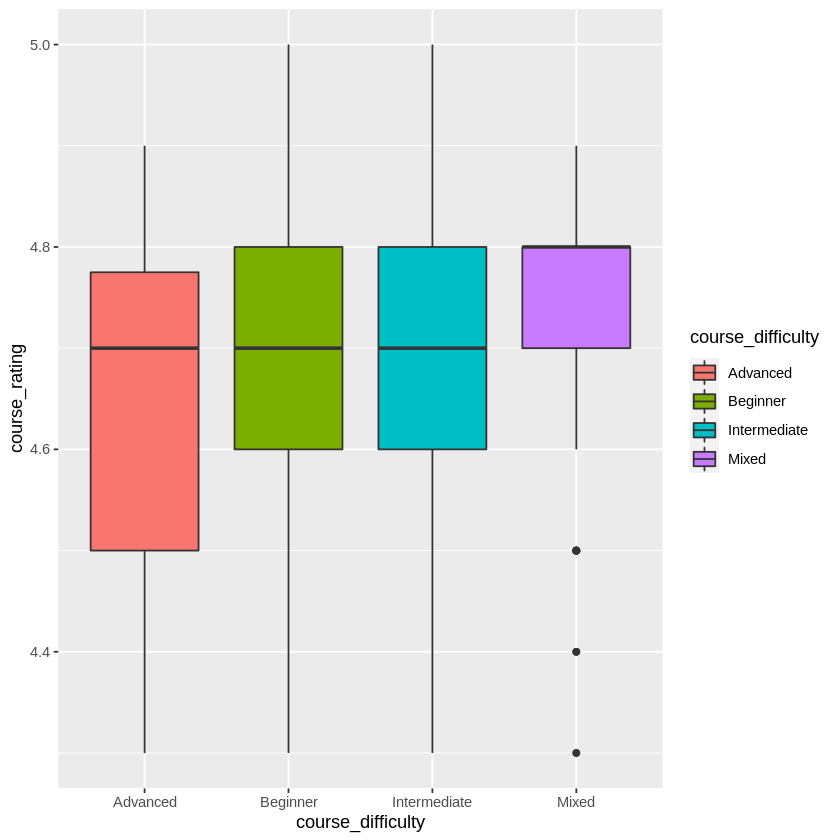

In [104]:
coursea %>% 
  filter(course_rating > lowerIQR) %>%
  ggplot(aes(course_difficulty,course_rating, fill=course_difficulty)) +
  geom_boxplot()

# Catagory data

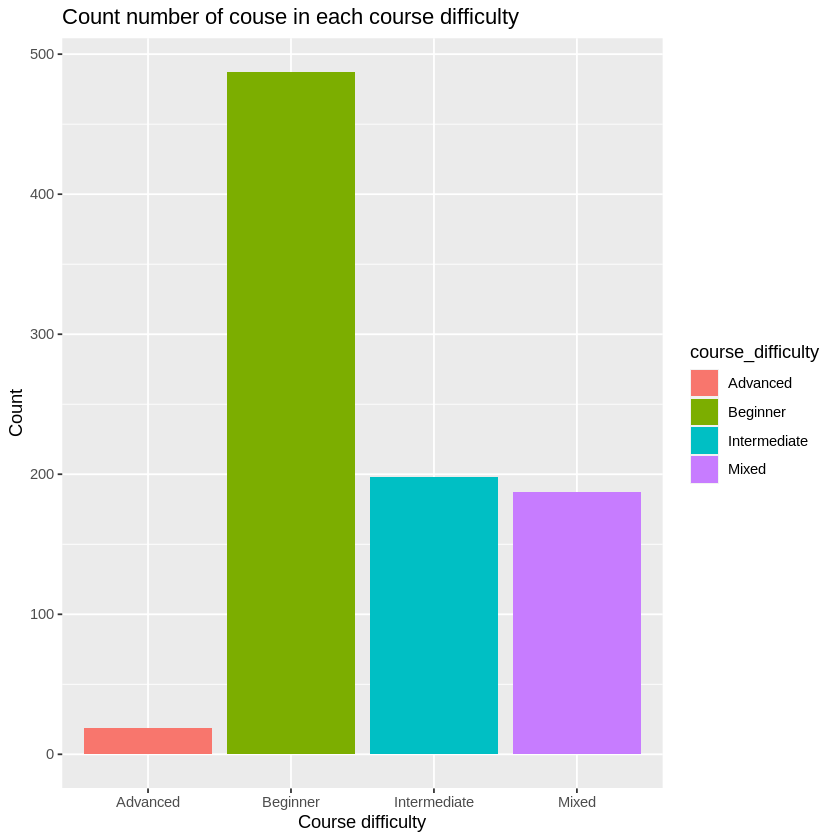

In [120]:
coursea %>%
  ggplot(aes(course_difficulty, fill=course_difficulty)) +
  geom_bar() + 
  ggtitle("Count number of couse in each course difficulty") +
  xlab("Course difficulty") +
  ylab("Count")

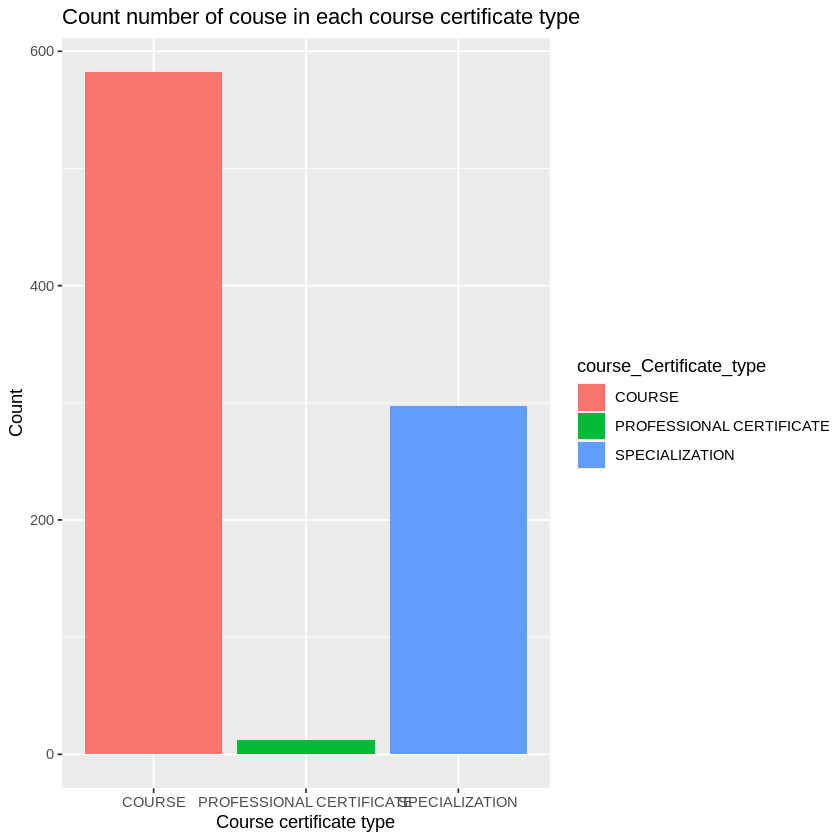

In [121]:
coursea %>%
  ggplot(aes(course_Certificate_type, fill=course_Certificate_type)) +
  geom_bar() + 
  ggtitle("Count number of couse in each course certificate type") +
  xlab("Course certificate type") +
  ylab("Count")

In [134]:
coursea %>%
  filter(course_students_enrolled > lowerIQR_enrolled) %>%
  filter(!is.na(course_students_enrolled)) %>%
  group_by(course_difficulty) %>%
  summarise(avg_enrolled = mean(course_students_enrolled))

,course_difficulty,avg_enrolled
,<chr>,<dbl>
1,Advanced,205000.0
2,Beginner,268809.5
3,Intermediate,270000.0
4,Mixed,272222.2


In [135]:
coursea %>%
  filter(course_students_enrolled > lowerIQR_enrolled) %>%
  filter(!is.na(course_students_enrolled)) %>%
  group_by(course_Certificate_type) %>%
  summarise(avg_enrolled = mean(course_students_enrolled))

,course_Certificate_type,avg_enrolled
,<chr>,<dbl>
1,COURSE,249239.1
2,PROFESSIONAL CERTIFICATE,288571.4
3,SPECIALIZATION,297272.7
